In [32]:
import random

from deap import base
from deap import creator
from deap import tools
import math
import numpy as np

import matplotlib.pyplot as plt

In [33]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [34]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", random.random)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_float, 70)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [35]:
def evalOneMax(individual):
    for x in individual:
        return x,((x*math.sin(10*math.pi*x))+1)

In [36]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selRoulette)

In [58]:
def main():
    pop = toolbox.population(n=100)
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    CXPB, MUTPB = 0.5, 0.2
    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]
    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    maior = max(fits)
    while max(fits) != min(fits) and g < 1000:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        pop[:] = offspring
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        maior = max(fits)
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
        melhor = tools.selBest(pop,1)[0]
        
        xinicio = np.arange(0,1,0.01)
        y = np.zeros(len(xinicio))
        for i,x in  enumerate(xinicio):
            y[i] = x*math.sin(10*math.pi*x) + 1
            
        plt.plot(xinicio,y,'b')
        
        y2 = np.zeros(len(melhor))
        for i, x in enumerate(melhor):
            y2[i] = x*math.sin(10*math.pi*x)+1
        
        plt.plot(melhor,y2,'r*')
        
        
        

-- Generation 1 --
  Min 0.12378851306222294
  Max 0.999495253208427
  Avg 0.6814713873858846
  Std 0.23433009613970857
-- Generation 2 --
  Min 0.17170199235671424
  Max 0.999495253208427
  Avg 0.7588501450922487
  Std 0.19204756472351464
-- Generation 3 --
  Min 0.46754917314835875
  Max 0.999495253208427
  Avg 0.8184068109088757
  Std 0.14071349196293756
-- Generation 4 --
  Min 0.0
  Max 0.999495253208427
  Avg 0.8397740295579456
  Std 0.15324572344901294
-- Generation 5 --
  Min 0.0
  Max 0.999495253208427
  Avg 0.8376747155536514
  Std 0.19058452437163398
-- Generation 6 --
  Min 0.5912027535256046
  Max 0.999495253208427
  Avg 0.8929940525943653
  Std 0.09540268138299439
-- Generation 7 --
  Min 0.0
  Max 0.999495253208427
  Avg 0.8931125678532221
  Std 0.12806127428677458
-- Generation 8 --
  Min 0.0
  Max 0.999495253208427
  Avg 0.869592724782417
  Std 0.17755110148894124
-- Generation 9 --
  Min 0.0
  Max 0.999495253208427
  Avg 0.8871326125028797
  Std 0.12462526805690646
--

-- Generation 76 --
  Min 0.0
  Max 0.952636222103307
  Avg 0.9351176714475861
  Std 0.09534866629984388
-- Generation 77 --
  Min 0.9103471545420028
  Max 0.952636222103307
  Avg 0.9472764167907108
  Std 0.013666731785059569
-- Generation 78 --
  Min 0.0
  Max 0.952636222103307
  Avg 0.9365130622323098
  Std 0.0953113796976246
-- Generation 79 --
  Min 0.0
  Max 0.952636222103307
  Avg 0.8972339803897517
  Std 0.20646740115566192
-- Generation 80 --
  Min 0.0
  Max 0.952636222103307
  Avg 0.9358890387073822
  Std 0.09538769320614819
-- Generation 81 --
  Min 0.9103471545420028
  Max 0.952636222103307
  Avg 0.9483756356577062
  Std 0.012680074405525845
-- Generation 82 --
  Min 0.9103471545420028
  Max 0.952636222103307
  Avg 0.9484073153471777
  Std 0.012686720268270836
-- Generation 83 --
  Min 0.9103471545420028
  Max 0.952636222103307
  Avg 0.9471386433203384
  Std 0.014221958659019887
-- Generation 84 --
  Min 0.9103471545420028
  Max 0.952636222103307
  Avg 0.9471386433203384
  S

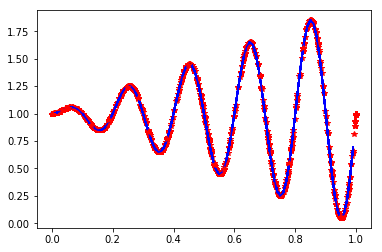

In [59]:

if __name__ == "__main__":
    main()